In [13]:
import pandas as pd
file_path = "./ref/인천교통공사_1호선 일별 승하차현황_20240630.csv"
df = pd.read_csv(file_path,encoding="EUC-KR")
df.head()

,역명,일자,이용인원,승차인원,하차인원
0,계양,2023-06-01,8360,4264,4096
1,귤현,2023-06-01,2793,1084,1709
2,박촌,2023-06-01,7998,4206,3792
3,임학,2023-06-01,16947,8552,8395
4,계산,2023-06-01,23140,11764,11376


In [14]:
columns = ['name','date','total','get in','get off']
df.columns = columns 
df = df.loc[:,:'get off']

In [15]:
df.tail()

,name,date,total,get in,get off
11875,지식정보단지,2024-06-30,2808,1377,1431
11876,인천대입구,2024-06-30,7030,3415,3615
11877,센트럴파크(재외동포청),2024-06-30,4577,2240,2337
11878,국제업무지구,2024-06-30,1083,585,498
11879,송도달빛축제공원,2024-06-30,5804,2871,2933


In [16]:
data = df.groupby(['name','date','total']).sum().reset_index()
data = data[data['date'] == '2023-06-01']
data

,name,date,total,get in,get off
0,간석오거리,2023-06-01,23044,11970,11074
396,갈산,2023-06-01,19852,10004,9848
792,경인교대입구,2023-06-01,12189,6120,6069
1188,계산,2023-06-01,23140,11764,11376
1584,계양,2023-06-01,8360,4264,4096
1980,국제업무지구,2023-06-01,3447,1777,1670
2376,귤현,2023-06-01,2793,1084,1709
2772,동막,2023-06-01,11229,5971,5258
3168,동수,2023-06-01,8518,4370,4148
3564,동춘,2023-06-01,21601,10486,11115


In [17]:
gdata = data[['name','date','total']]
gdata = gdata.sort_values(by=['name','date'],ascending=[True,True])
gdata.head(10)

,name,date,total
0,간석오거리,2023-06-01,23044
396,갈산,2023-06-01,19852
792,경인교대입구,2023-06-01,12189
1188,계산,2023-06-01,23140
1584,계양,2023-06-01,8360
1980,국제업무지구,2023-06-01,3447
2376,귤현,2023-06-01,2793
2772,동막,2023-06-01,11229
3168,동수,2023-06-01,8518
3564,동춘,2023-06-01,21601


In [18]:
mdata = gdata.groupby(by="name").sum().reset_index()
tdata = mdata[['name','total']]
tdata

,name,total
0,간석오거리,23044
1,갈산,19852
2,경인교대입구,12189
3,계산,23140
4,계양,8360
5,국제업무지구,3447
6,귤현,2793
7,동막,11229
8,동수,8518
9,동춘,21601


In [19]:
sdata = tdata.sort_values(by='total',ascending=False)
sdata.head(20)
total_data = sdata[:20]
total_data

,name,total
26,작전,29115
15,부평시장,27782
24,인천터미널,27122
20,예술회관,23912
3,계산,23140
0,간석오거리,23044
29,테크노파크,22082
9,동춘,21601
1,갈산,19852
22,인천대입구,18744


In [23]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

d2_path = "./ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
plt.rcParams["font.family"] = "D2Coding"

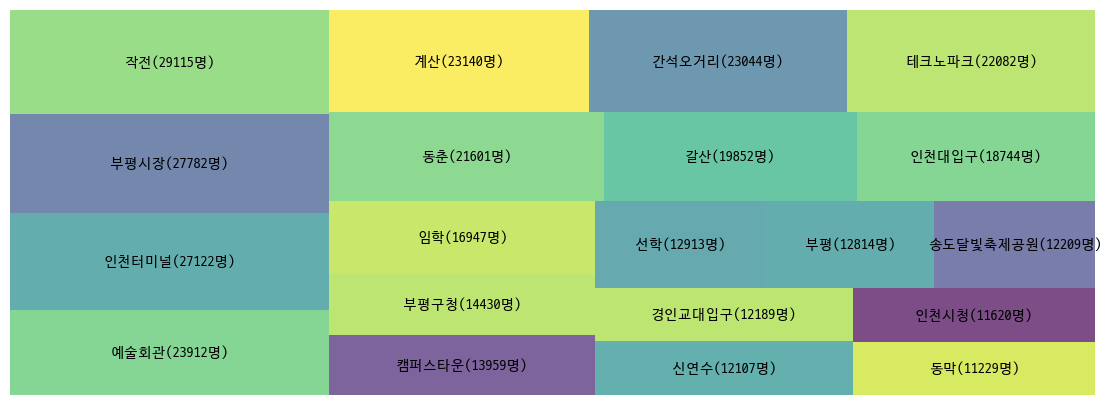

In [27]:
import squarify
plt.figure(figsize=(14,5))
squarify.plot(sizes=total_data['total'], label= [f"{x[0]}({x[1]}명)" for x in zip (total_data['name'], total_data['total'])], alpha=0.7)
plt.rcParams['font.size']= 10
plt.rcParams['text.color']='black'
plt.gca().invert_yaxis()
plt.axis("off")
plt.show()